
🔎 Evaluation at Threshold = 0.3
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


🔎 Evaluation at Threshold = 0.5
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔎 Evaluation at Threshold = 0.7
Confusion Matrix:
 [[42  1]
 [ 4 67]]
Classification Report:
               precision    recall  f1-score   support

      

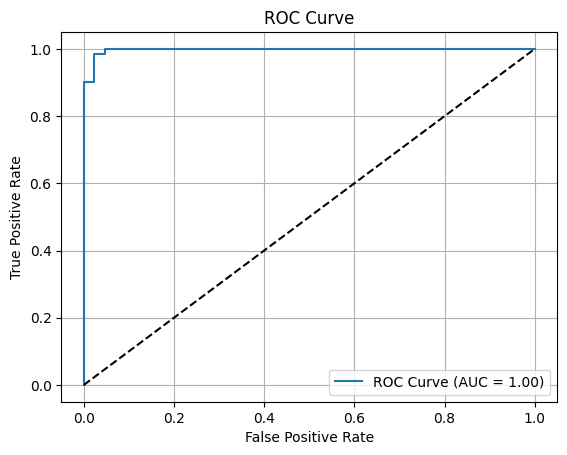

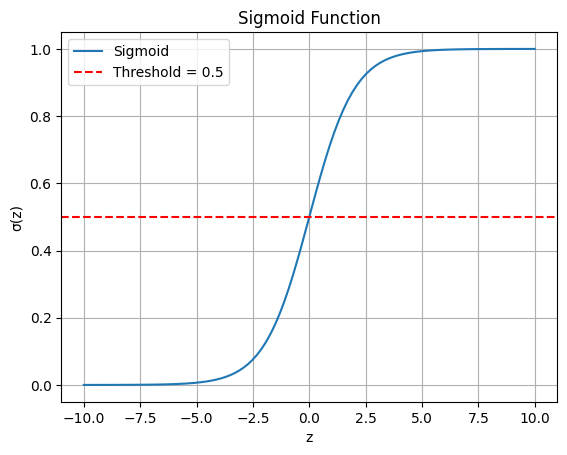

In [9]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 2: Load and clean dataset
df = pd.read_csv('/content/data.csv')
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)  # Drop useless columns
df['diagnosis'] = pd.factorize(df['diagnosis'])[0]    # Encode diagnosis

# Step 3: Feature and target split
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Step 4: Train/test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Step 7: Threshold tuning
def evaluate_threshold(threshold):
    y_pred = (y_probs >= threshold).astype(int)
    print(f"\n🔎 Evaluation at Threshold = {threshold}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Try different thresholds
for t in [0.3, 0.5, 0.7]:
    evaluate_threshold(t)

# Step 8: ROC-AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Sigmoid Function Visualization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals), label='Sigmoid')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.grid(True)
plt.show()
